## Importing Libraries and Data:

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

In [3]:
path = r'C:\Users\steve\Documents\Machine_Learning_CF\Data_Set'

In [7]:
df = pd.read_csv(os.path.join(path, 'weather_scaled.csv'))

In [8]:
df_answers = pd.read_csv(os.path.join(path, 'dataset_answers.csv'))

## Cleaning Data:

In [9]:
df

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1           0.660514          -0.02793        0.826097   
1      19600102      1           0.244897          -0.02793        0.735760   
2      19600103      1           1.076130          -0.02793        1.277781   
3      19600104      1          -1.001953          -0.02793        1.458455   
4      19600105      1           0.244897          -0.02793        1.729466   
...         ...    ...                ...               ...             ...   
22945  20221027     10          -1.833187          -0.02793        0.284075   
22946  20221028     10           0.244897          -0.02793        0.103401   
22947  20221029     10          -0.586336          -0.02793        0.013064   
22948  20221030     10          -0.170720          -0.02793        0.374412   
22949  20221031     10          -0.170720          -0.02793        0.735760   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           -0.001949               -1.101066            -0.265148   
1           -0.001949               -1.058108             1.658760   
2           -0.001949               -1.251420             0.155707   
3           -0.001949               -0.821838            -0.445514   
4           -0.001949               -0.746661            -0.164944   
...               ...                     ...                  ...   
22945        1.037367               -0.005632            -0.004619   
22946        0.976231               -0.005632            -0.004619   
22947        0.716402               -0.005632            -0.004619   
22948        0.487141               -0.005632            -0.004619   
22949        0.196744               -0.005632            -0.004619   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0             -0.179228       -0.902918  ...             -0.443701   
1             -0.179228       -0.810126  ...              0.783085   
2             -0.179228       -1.065304  ...              0.783085   
3             -0.179228       -0.114186  ...              0.783085   
4             -0.179228        0.187388  ...             -1.670486   
...                 ...             ...  ...                   ...   
22945         -0.179228        0.720943  ...             -0.443701   
22946         -0.179228        0.187388  ...             -0.443701   
22947         -0.179228        0.349774  ...             -0.443701   
22948         -0.179228        0.280180  ...             -0.443701   
22949         -0.179228       -0.322968  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...   

In [10]:
df_answers

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [51]:
columns_to_drop_2 = ['DATE']
df_answers.drop(columns=columns_to_drop_2, inplace=True)

In [11]:
# Creating a list of columns to drop, due to there not being enough data.
columns_to_drop = ['DATE', 'MONTH','TOURS_wind_speed', 'TOURS_humidity',
                   'TOURS_pressure', 'TOURS_global_radiation',
                   'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
                   'TOURS_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed',
                   'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine',
                   'ROMA_temp_mean', 'GDANSK_cloud_cover', 'GDANSK_humidity',
                   'GDANSK_precipitation', 'GDANSK_snow_depth','GDANSK_temp_mean',
                   'GDANSK_temp_min','GDANSK_temp_max']

In [13]:
# Performing the drop of the above columns
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
df

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0               0.660514          -0.02793        0.826097       -0.001949   
1               0.244897          -0.02793        0.735760       -0.001949   
2               1.076130          -0.02793        1.277781       -0.001949   
3              -1.001953          -0.02793        1.458455       -0.001949   
4               0.244897          -0.02793        1.729466       -0.001949   
...                  ...               ...             ...             ...   
22945          -1.833187          -0.02793        0.284075        1.037367   
22946           0.244897          -0.02793        0.103401        0.976231   
22947          -0.586336          -0.02793        0.013064        0.716402   
22948          -0.170720          -0.02793        0.374412        0.487141   
22949          -0.170720          -0.02793        0.735760        0.196744   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0                   -1.101066            -0.265148         -0.179228   
1                   -1.058108             1.658760         -0.179228   
2                   -1.251420             0.155707         -0.179228   
3                   -0.821838            -0.445514         -0.179228   
4                   -0.746661            -0.164944         -0.179228   
...                       ...                  ...               ...   
22945               -0.005632            -0.004619         -0.179228   
22946               -0.005632            -0.004619         -0.179228   
22947               -0.005632            -0.004619         -0.179228   
22948               -0.005632            -0.004619         -0.179228   
22949               -0.005632            -0.004619         -0.179228   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
0           -0.902918        -0.528623       -0.845652  ...   
1           -0.810126        -0.582946       -0.462450  ...   
2           -1.065304        -0.257010       -0.186545  ...   
3           -0.114186        -0.555784       -0.385810  ...   
4            0.187388        -1.003946       -1.075573  ...   
...               ...              ...             ...  ...   
22945        0.720943         0.747959        0.779123  ...   
22946        0.187388         0.856604        1.223637  ...   
22947        0.349774         0.856604        1.039701  ...   
22948        0.280180         0.680055        0.809780  ...   
22949       -0.322968         0.422023        0.549202  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                 -0.443701           0.761754          -1.299744   
1                  0.783085           1.183580          -1.262455   
2                  0.783085           1.183580          -0.432779   
3                  0.783085           0.480538           0.387574   
4                 -1.670486          -0.363113           1.729970   
...                     ...                ...                ...   
22945             -0.443701          -0.081896          -0.003958   
22946             -0.443701          -0.081896          -0.003958   
22947             -0.443701          -0.081896          -0.003958   
22948             -0.443701          -0.081896          -0.003958   
22949             -0.443701          -0.081896          -0.003958   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
0                      -0.806427               -0.088407            -0.024706   
1                      -1.042055                0.503361            -0.024706   
2                      -1.136306               -0.396127            -0.024706   
3                      -1.183432                0.669056            -0.024706   
4                      -0.794645               -0.490810            -0.024706   
...                          ...                     ...                  ...   
22945                  -0.005290               -0.00

In [52]:
df_answers

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
22945                       0                          0   
22946                       0                          0   
22947                       0                          0   
22948                       0                          0   
22949                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0  

## Creating Test and Train Samples:

In [53]:
X = df
y = df_answers

In [54]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 16)
(5738, 16)


## Running Decision Tree:

[Text(0.5, 0.9166666666666666, 'x[49] <= 0.403\ngini = 0.359\nsamples = 17212\nvalue = [[1, 1, 1 ... 1, 1, 1]\n[12948, 4264, 0 ... 0, 0, 0]\n[11182, 6030, 0 ... 0, 0, 0]\n...\n[17212, 0, 0 ... 0, 0, 0]\n[14290, 2922, 0 ... 0, 0, 0]\n[16314, 898, 0 ... 0, 0, 0]]'),
 Text(0.25, 0.75, 'x[98] <= -0.216\ngini = 0.156\nsamples = 10778\nvalue = [[1, 1, 1 ... 0, 0, 0]\n[10106, 672, 0 ... 0, 0, 0]\n[9045, 1733, 0 ... 0, 0, 0]\n...\n[10778, 0, 0 ... 0, 0, 0]\n[10529, 249, 0 ... 0, 0, 0]\n[10616, 162, 0 ... 0, 0, 0]]'),
 Text(0.125, 0.5833333333333334, 'x[19] <= 0.053\ngini = 0.089\nsamples = 7558\nvalue = [[1, 1, 1 ... 0, 0, 0]\n[7435, 123, 0 ... 0, 0, 0]\n[6871, 687, 0 ... 0, 0, 0]\n...\n[7558, 0, 0 ... 0, 0, 0]\n[7536, 22, 0 ... 0, 0, 0]\n[7544, 14, 0 ... 0, 0, 0]]'),
 Text(0.0625, 0.4166666666666667, 'x[78] <= 0.233\ngini = 0.066\nsamples = 6450\nvalue = [[1, 1, 1 ... 0, 0, 0]\n[6409, 41, 0 ... 0, 0, 0]\n[6450, 0, 0 ... 0, 0, 0]\n...\n[6450, 0, 0 ... 0, 0, 0]\n[6446, 4, 0 ... 0, 0, 0]\n[6442,

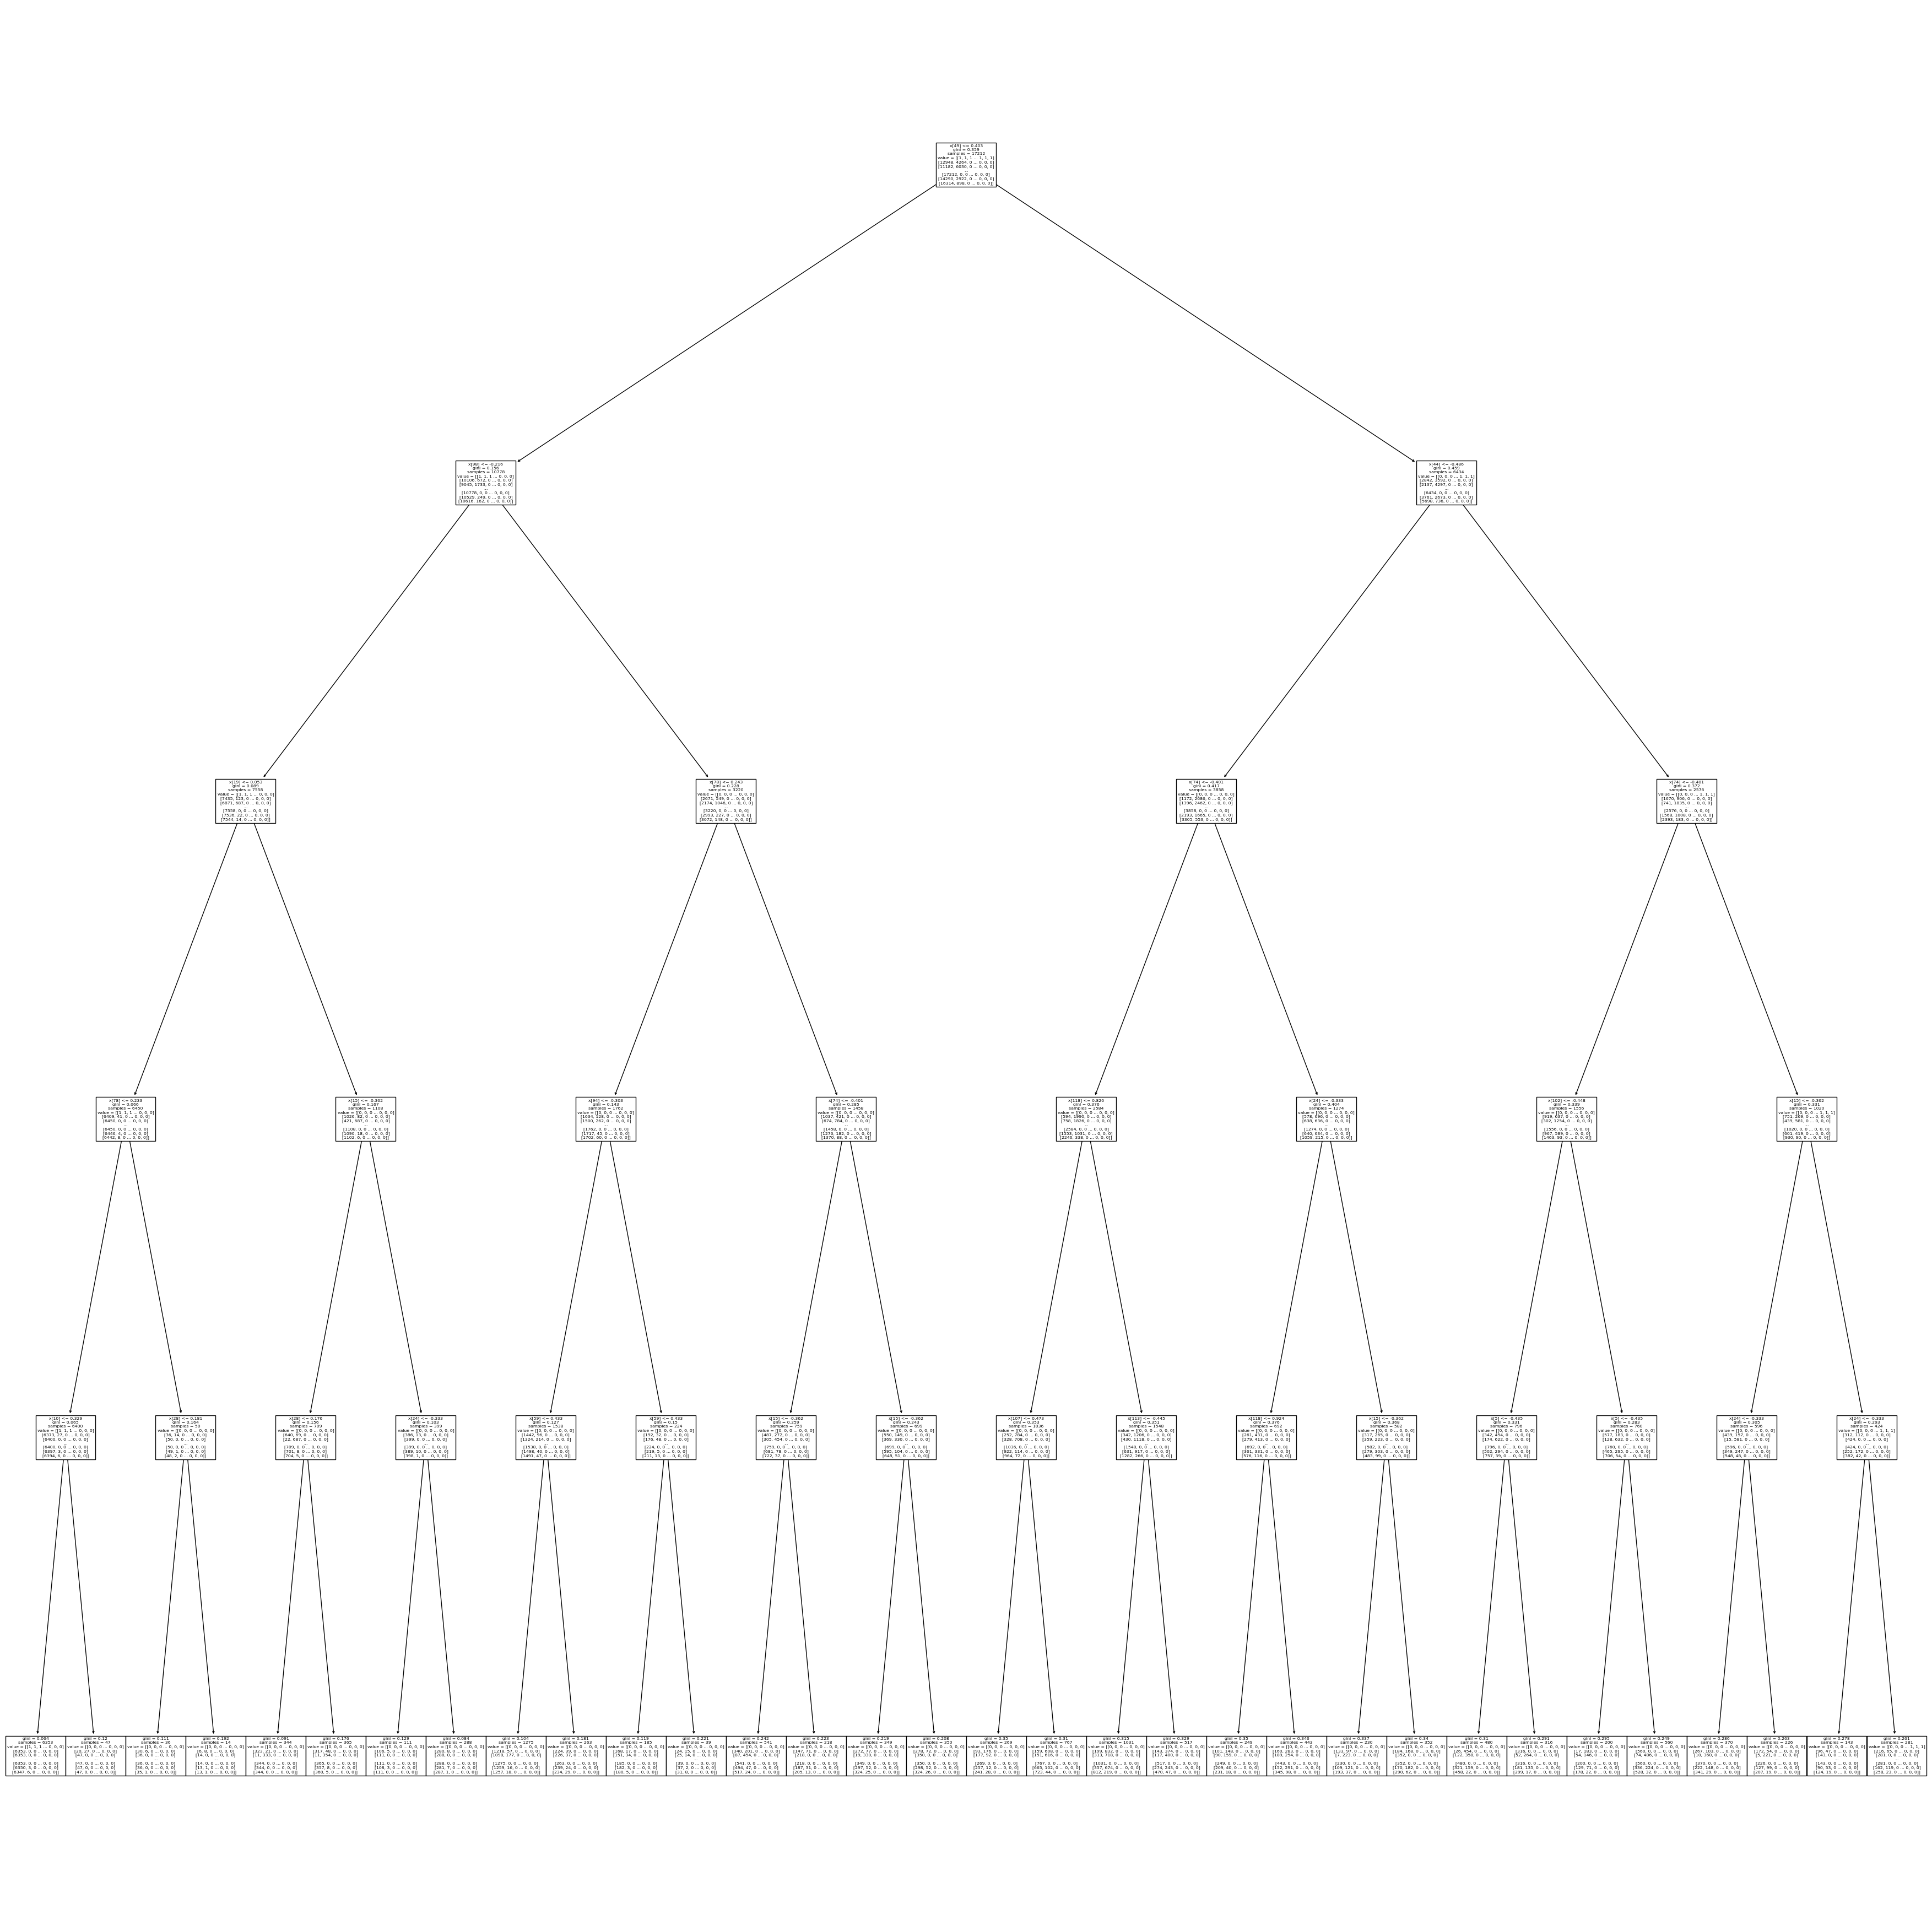

In [24]:
# Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=5)
weather_dt.fit(X_train, y_train)
figure(figsize=(45,45))
tree.plot_tree(iris_dt)

# Resulting chart is far too difficult to read.  Tried adjusting the figure size
# Its more readible if the image is opened in a new tab.

[Text(0.5, 0.9166666666666666, 'x[49] <= 0.403\ngini = 0.359\nsamples = 17212\nvalue = [[1, 1, 1 ... 1, 1, 1]\n[12948, 4264, 0 ... 0, 0, 0]\n[11182, 6030, 0 ... 0, 0, 0]\n...\n[17212, 0, 0 ... 0, 0, 0]\n[14290, 2922, 0 ... 0, 0, 0]\n[16314, 898, 0 ... 0, 0, 0]]'),
 Text(0.25, 0.75, 'x[98] <= -0.216\ngini = 0.156\nsamples = 10778\nvalue = [[1, 1, 1 ... 0, 0, 0]\n[10106, 672, 0 ... 0, 0, 0]\n[9045, 1733, 0 ... 0, 0, 0]\n...\n[10778, 0, 0 ... 0, 0, 0]\n[10529, 249, 0 ... 0, 0, 0]\n[10616, 162, 0 ... 0, 0, 0]]'),
 Text(0.125, 0.5833333333333334, 'x[19] <= 0.053\ngini = 0.089\nsamples = 7558\nvalue = [[1, 1, 1 ... 0, 0, 0]\n[7435, 123, 0 ... 0, 0, 0]\n[6871, 687, 0 ... 0, 0, 0]\n...\n[7558, 0, 0 ... 0, 0, 0]\n[7536, 22, 0 ... 0, 0, 0]\n[7544, 14, 0 ... 0, 0, 0]]'),
 Text(0.0625, 0.4166666666666667, 'x[78] <= 0.233\ngini = 0.066\nsamples = 6450\nvalue = [[1, 1, 1 ... 0, 0, 0]\n[6409, 41, 0 ... 0, 0, 0]\n[6450, 0, 0 ... 0, 0, 0]\n...\n[6450, 0, 0 ... 0, 0, 0]\n[6446, 4, 0 ... 0, 0, 0]\n[6442,

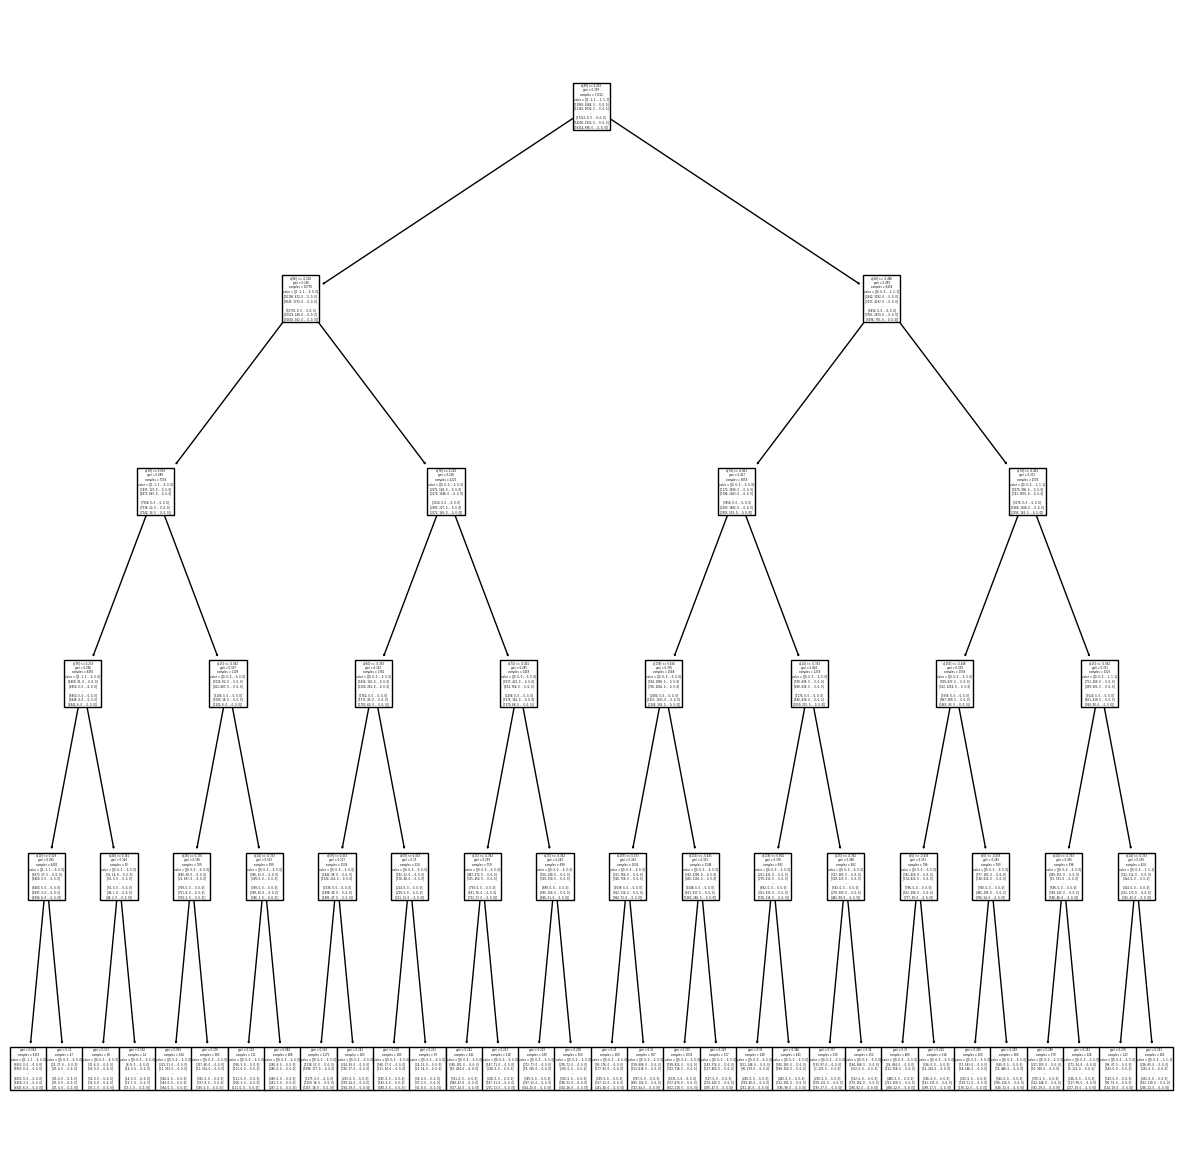

In [34]:
# Trying this with a max_depth of 3.  Initially it worked and resulted in
# a much smaller chart - but now its spitting out the same size as a max_depth
# of 5?

weather2_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=3)
weather2_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(iris_dt)

In [35]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather2_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(iris_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\steve\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 221, in a

Train accuracy score:  nan


C:\Users\steve\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\steve\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 221, in a

Unfortunately, Train Accuracy Score is "Nan".  Not too sure what didn't work out there, hoping to get some insights after submitting this assignment.

# Running Artificial Neural Networks Model:

In [41]:
X_train[:10]

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
8196           -1.417570         -0.027930       -0.619294       -0.750867   
20472           1.076130         -0.573924        0.555086       -0.215925   
18269           0.660514         -0.846921        0.735760       -1.270525   
7713           -1.417570         -0.027930       -0.167609        0.410721   
21958           0.660514          3.111534       -0.619294       -0.689731   
11464           0.660514         -0.983419       -1.070979        1.847422   
3984           -1.001953         -0.027930        0.374412       -0.001949   
4752            1.076130         -0.027930        1.639129       -0.001949   
11092           0.660514         -0.027930        0.645423        0.150892   
21377          -1.417570         -1.119918       -1.341989       -0.093653   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
8196                 1.186458            -0.325270         -0.179228   
20472               -0.821838            -0.265148         -0.179228   
18269               -1.004410            -0.305229          0.817688   
7713                -0.585568            -0.445514         -0.179228   
21958               -0.821838             1.919289         -0.179228   
11464                1.583822            -0.445514         -0.179228   
3984                -0.811098            -0.445514         -0.179228   
4752                -1.251420            -0.445514         -0.179228   
11092                0.670960             0.556521         -0.179228   
21377               -0.005632            -0.445514         -0.179228   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
8196         0.535359         1.359088        1.116341  ...   
20472       -1.065304        -1.655817       -1.458775  ...   
18269       -0.926116        -1.655817       -1.887961  ...   
7713        -0.253374        -1.601495       -1.550743  ...   
21958       -0.949314        -0.582946       -0.692371  ...   
11464        1.277695         1.073894        0.656499  ...   
3984        -0.230176        -0.908881       -1.044917  ...   
4752        -1.065304        -1.941011       -2.102554  ...   
11092        0.210586         0.720797        0.748467  ...   
21377        2.066427         1.141798        0.549202  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
8196               0.169692           0.058712          -0.563290   
20472             -0.443701          -0.081896          -0.003958   
18269             -0.443701           1.042971           0.406218   
7713               1.396477           1.183580          -1.029400   
21958             -0.443701          -0.081896          -0.003958   
11464             -1.057093           0.902363           2.196080   
3984               0.169692           1.042971          -1.197200   
4752               1.396477           1.886622           1.804548   
11092              0.783085           0.902363          -1.029400   
21377             -0.443701          -0.081896          -0.003958   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
8196                   -0.005290               -0.159420            -0.024706   
20472                  -1.065618               -0.005560            -0.024706   
18269                  -0.829990               -0.455304            -0.024706   
7713                   -1.112744                1.379179            -0.024706   
21958                  -0.005290               -0.005560            -0.024706   
11464                   2.315650               -0.490810            -0.024706   
3984                   -0.829990               -0.455304            -0.024706   
4752                   -1.183432               -0.490810            -0.024706   
11092                   0.866535                0.420514            -0.024706   
21377                   1.773704               -0.005560            -0.024706   

       VA

In [44]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930545 ... -0.0139084  -0.0077553
  -0.00981651]]


In [45]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

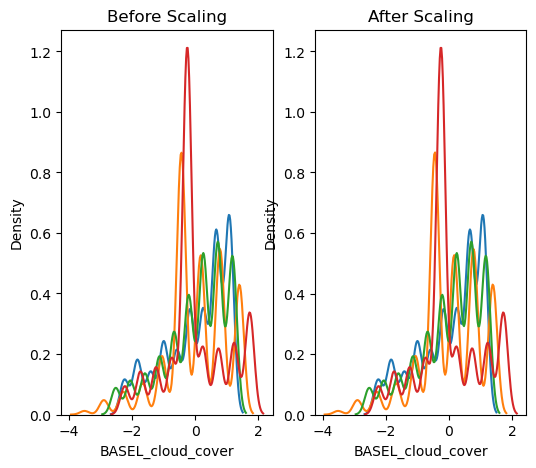

In [46]:
# So... there are 147 columns, which seems like a really bad idea to put it all
# into one chart. Instead I will do a few charts, using samples of locations.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_cloud_cover'], ax=ax1)
sns.kdeplot(X_train['VALENTIA_cloud_cover'], ax=ax1)
sns.kdeplot(X_train['DEBILT_cloud_cover'], ax=ax1)
sns.kdeplot(X_train['BUDAPEST_cloud_cover'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_cloud_cover'], ax=ax2)
sns.kdeplot(X_train_df['VALENTIA_cloud_cover'], ax=ax2)
sns.kdeplot(X_train_df['DEBILT_cloud_cover'], ax=ax2)
sns.kdeplot(X_train_df['BUDAPEST_cloud_cover'], ax=ax2)

plt.show()

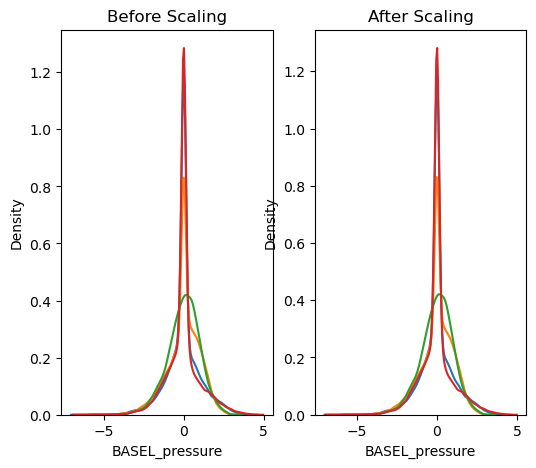

In [47]:
# Chart 2 using same locations but a different set of data:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_pressure'], ax=ax1)
sns.kdeplot(X_train['VALENTIA_pressure'], ax=ax1)
sns.kdeplot(X_train['DEBILT_pressure'], ax=ax1)
sns.kdeplot(X_train['BUDAPEST_pressure'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_pressure'], ax=ax2)
sns.kdeplot(X_train_df['VALENTIA_pressure'], ax=ax2)
sns.kdeplot(X_train_df['DEBILT_pressure'], ax=ax2)
sns.kdeplot(X_train_df['BUDAPEST_pressure'], ax=ax2)

plt.show()

In [55]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

ValueError: Multioutput target data is not supported with label binarization

From what I can gather, the y_train/y_test shape cannot have more than 1 column... which I don't think can be done with the answers data set, given its nature? I am stuck here and hope for some guidance once submitting this.